In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample/jini...png


Iteration 0, Loss: 2064.511962890625
Iteration 100, Loss: 18.25872802734375
Iteration 200, Loss: 4.8430562019348145
Iteration 300, Loss: 3.893669843673706
Iteration 400, Loss: 3.544513463973999
Iteration 500, Loss: 3.3007357120513916
Iteration 600, Loss: 3.1685194969177246
Iteration 700, Loss: 3.0502984523773193
Iteration 800, Loss: 2.989457845687866
Iteration 900, Loss: 2.9089560508728027
Iteration 1000, Loss: 2.851985454559326
Iteration 1100, Loss: 2.792191505432129
Iteration 1200, Loss: 2.75266695022583
Iteration 1300, Loss: 2.708869695663452
Iteration 1400, Loss: 2.672151803970337
Iteration 1500, Loss: 2.6585018634796143
Iteration 1600, Loss: 2.6133813858032227
Iteration 1700, Loss: 2.587021589279175
Iteration 1800, Loss: 2.56594181060791
Iteration 1900, Loss: 2.5292227268218994
Iteration 2000, Loss: 2.5134785175323486
Iteration 2100, Loss: 2.4832401275634766
Iteration 2200, Loss: 2.464247465133667
Iteration 2300, Loss: 2.4422426223754883
Iteration 2400, Loss: 2.4226903915405273


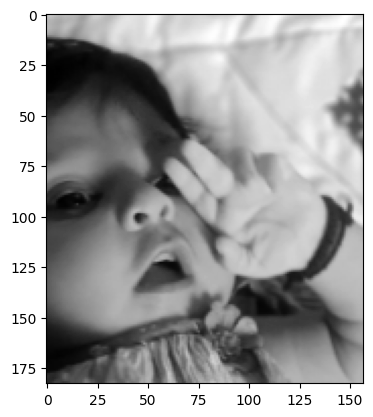

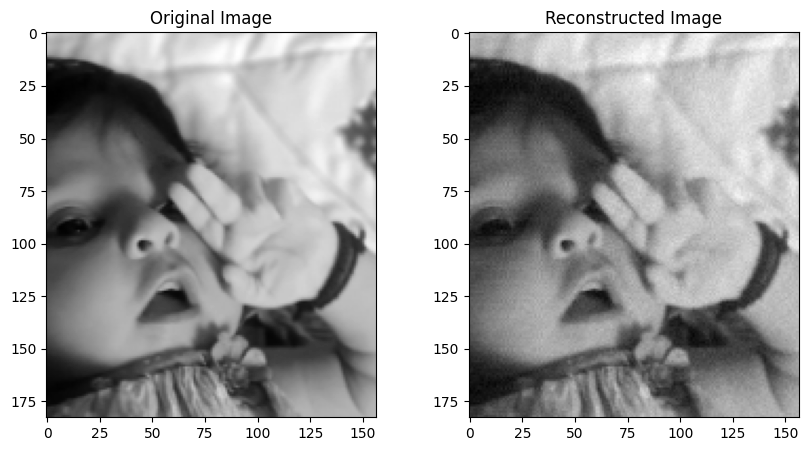

RMSE: 0.01419959869235754
PSNR: 36.954478588616986 dB


In [10]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


img_path = '/kaggle/input/sample/jini...png'
img = torchvision.io.read_image(img_path).float() / 255.0  # Normalize pixel values
img_gray = img.mean(dim=0)  # Convert to grayscale
plt.imshow(img_gray, cmap='gray')

# Define the matrix factorization function
def factorize_img(img, r, lr=0.01, num_iters=2500):
    """Factorize the image matrix into W and H."""
    img = img.to(device)
    h, w = img.shape

    W = torch.randn(h, r, requires_grad=True, device=device)
    H = torch.randn(r, w, requires_grad=True, device=device)

    # Optimizer
    optimizer = torch.optim.Adam([W, H], lr=lr)


    for i in range(num_iters):
        optimizer.zero_grad()

        reconstructed_img = torch.mm(W, H)

        loss = torch.norm(reconstructed_img - img)
        
        # Backpropagation
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss.item()}")

    return W, H, loss.item()

# Run matrix factorization
r = 150  
W, H, loss = factorize_img(img_gray, r)

# Reconstruct and plot images
reconstructed_img = torch.mm(W, H).cpu().detach().numpy()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_gray.cpu(), cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(reconstructed_img, cmap='gray')
ax[1].set_title('Reconstructed Image')
plt.show()

# RMSE and PSNR calculations
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    max_pixel = 1.0  # Since the image is normalized between 0 and 1
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

rmse = calculate_rmse(img_gray.cpu().numpy(), reconstructed_img)
psnr = calculate_psnr(img_gray.cpu().numpy(), reconstructed_img)

print(f"RMSE: {rmse}")
print(f"PSNR: {psnr} dB")


Processing for r = 50...


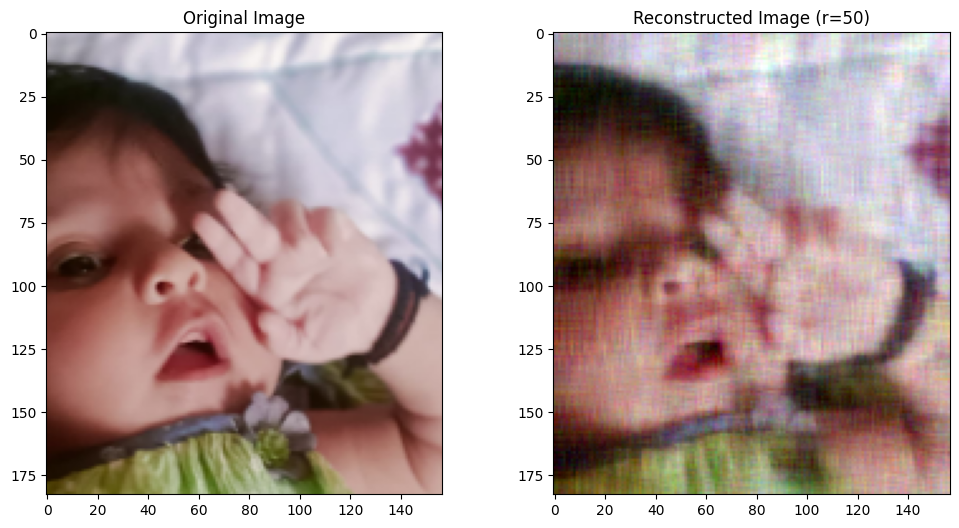

RMSE (r=50): 0.04857255890965462
PSNR (r=50): 26.272180326640257 dB
Processing for r = 100...


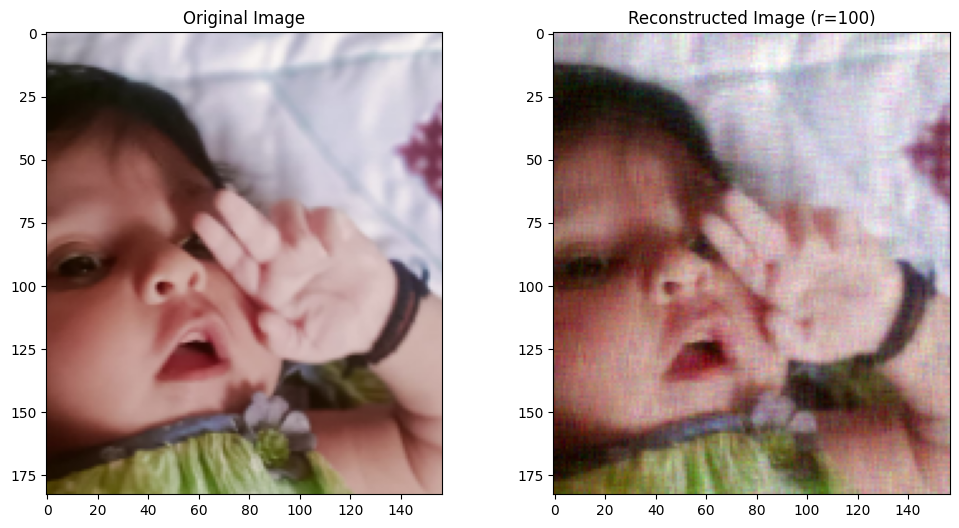

RMSE (r=100): 0.034462329000234604
PSNR (r=100): 29.253107516418364 dB
Processing for r = 150...


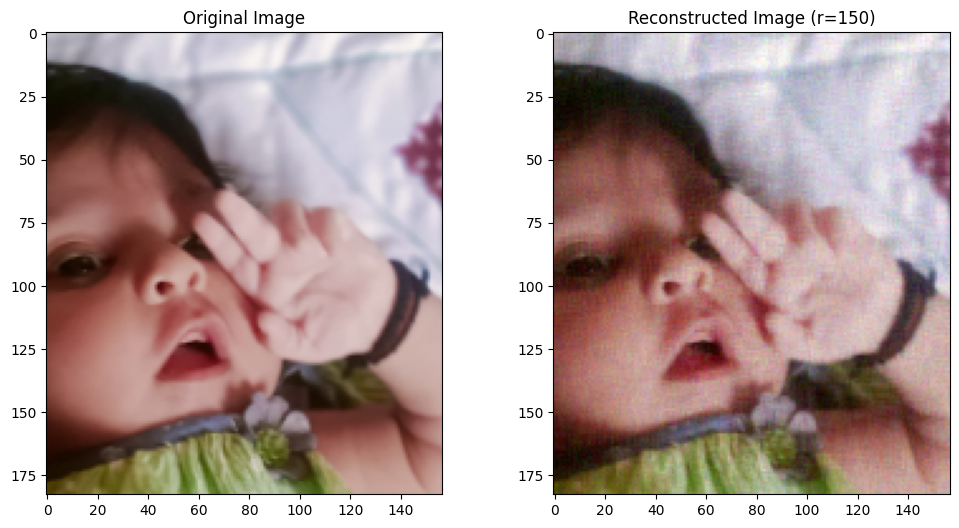

RMSE (r=150): 0.024954762309789658
PSNR (r=150): 32.0569312473043 dB
Processing for r = 200...


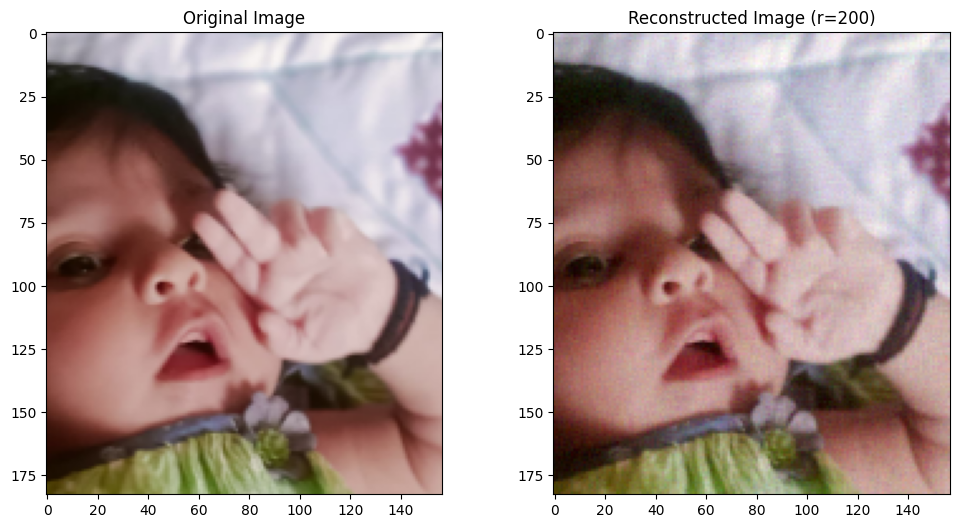

RMSE (r=200): 0.018305785953998566
PSNR (r=200): 34.74823240130655 dB
Processing for r = 250...


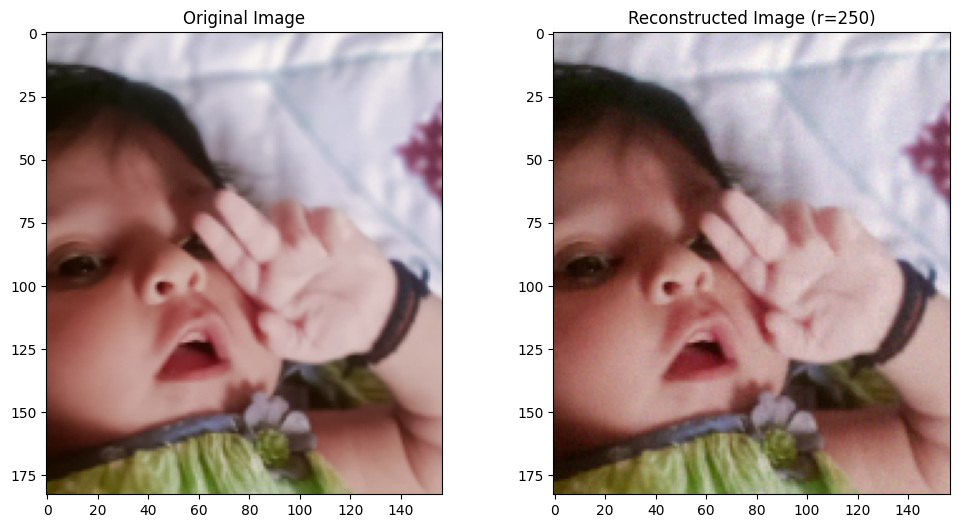

RMSE (r=250): 0.01151864230632782
PSNR (r=250): 38.77197415717753 dB


In [7]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

img_path = '/kaggle/input/sample/jini...png'
img = torchvision.io.read_image(img_path).float() / 255.0
img = img.to(device)

def factorize_ch(ch, r, lr=0.01, num_iters=3000):
    h, w = ch.shape
    W = torch.randn(h, r, requires_grad=True, device=device)
    H = torch.randn(r, w, requires_grad=True, device=device)
    opt = torch.optim.Adam([W, H], lr=lr)

    for i in range(num_iters):
        opt.zero_grad()
        recon_ch = torch.mm(W, H)
        loss = torch.norm(recon_ch - ch, 'fro') ** 2
        loss.backward()
        opt.step()

    return W, H, loss.item()

def calculate_rmse(orig, recon):
    return np.sqrt(np.mean((orig - recon) ** 2))

def calculate_psnr(orig, recon):
    mse = np.mean((orig - recon) ** 2)
    max_pixel = 1.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Experiment with different values of r
r_values = [50, 100, 150, 200, 250]
losses_r = {}
rmse_r = {}
psnr_r = {}

for r in r_values:
    recon_channels = []
    print(f"Processing for r = {r}...")

    for c in range(img.shape[0]):
        ch = img[c, :, :]
        W, H, loss = factorize_ch(ch, r)
        recon_ch = torch.mm(W, H).cpu().detach().numpy()
        recon_channels.append(recon_ch)

    recon_img = np.stack(recon_channels, axis=0)
    recon_img = np.transpose(recon_img, (1, 2, 0))
    orig_img = img.cpu().detach().numpy()
    orig_img = np.transpose(orig_img, (1, 2, 0))

    rmse_r[r] = calculate_rmse(orig_img, recon_img)
    psnr_r[r] = calculate_psnr(orig_img, recon_img)
    losses_r[r] = loss

    # Plot original and reconstructed images for each r
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(orig_img)
    ax[0].set_title(f'Original Image')
    ax[1].imshow(recon_img)
    ax[1].set_title(f'Reconstructed Image (r={r})')
    plt.show()

    print(f"RMSE (r={r}): {rmse_r[r]}")
    print(f"PSNR (r={r}): {psnr_r[r]} dB")
